# Imports

In [9]:
import tensorflow as tf   
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')

# Load Dataset

In [12]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [13]:
train_images, test_images = train_images / 255.0, test_images / 255.0

# flatten the label values
train_labels, test_labels = train_labels.flatten(), test_labels.flatten()

# Visualizing a sample of the data

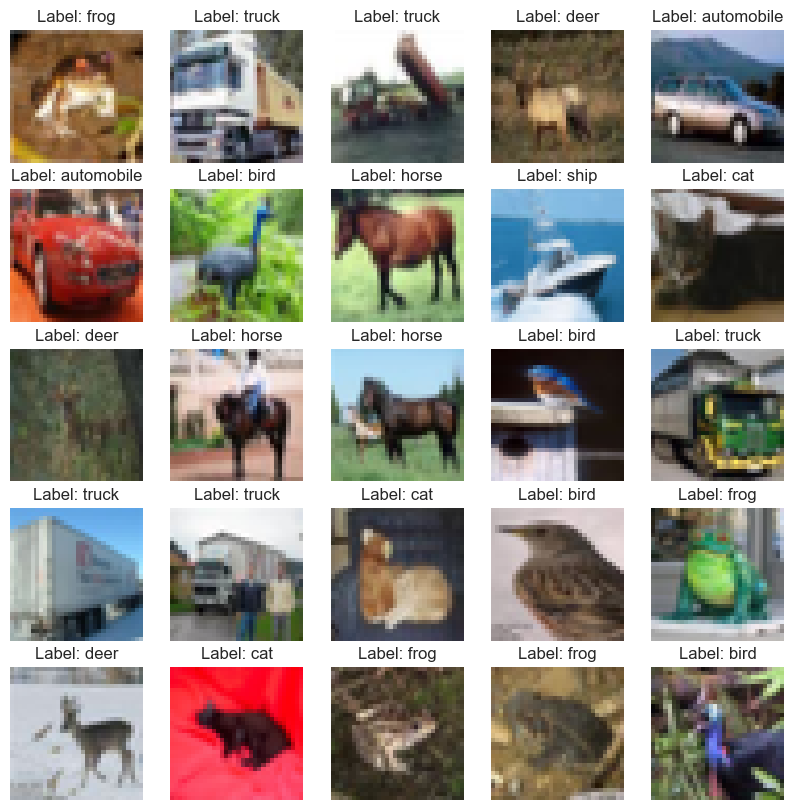

In [15]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", 
               "dog", "frog", "horse", "ship", "truck"]

fig, axes = plt.subplots(5, 5, figsize=(10, 10))

axes = axes.ravel()

for idx in range(5*5):
    axes[idx].imshow(train_images[idx])
    axes[idx].set_title(f"Label: {class_names[train_labels[idx]]}")
    axes[idx].axis('off')  # Removing the axes for a cleaner look

plt.show()

# Building the model

In [20]:
K = len(set(train_labels))
print("number of classes:", K)

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

model.summary() #This shows a table displaying a summary of the layers and parameters

number of classes: 10


C:\Users\RIHAB-PC\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,050,634 (4.01 MB)

 Trainable params: 1,049,482 (4.00 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
his_model1 = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1561s 990ms/step - accuracy: 0.4606 - loss: 1.6147 - val_accuracy: 0.4929 - val_loss: 1.7788
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 821s 526ms/step - accuracy: 0.6897 - loss: 0.8920 - val_accuracy: 0.7156 - val_loss: 0.8305
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2934s 2s/step - accuracy: 0.7546 - loss: 0.7026 - val_accuracy: 0.5707 - val_loss: 1.3143
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 415s 266ms/step - accuracy: 0.7982 - loss: 0.5827 - val_accuracy: 0.7504 - val_loss: 0.7603
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 417s 267ms/step - accuracy: 0.8331 - loss: 0.4863 - val_accuracy: 0.7622 - val_loss: 0.7346
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 404s 258ms/step - accuracy: 0.8627 - loss: 0.3982 - val_accuracy: 0.7795 - val_loss: 0.6895
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 395s 253ms/step - accuracy: 0.8877 - loss: 0.3229 - val_accuracy: 0.7726 - val_loss: 0.7595
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 399s 255ms/step - acc

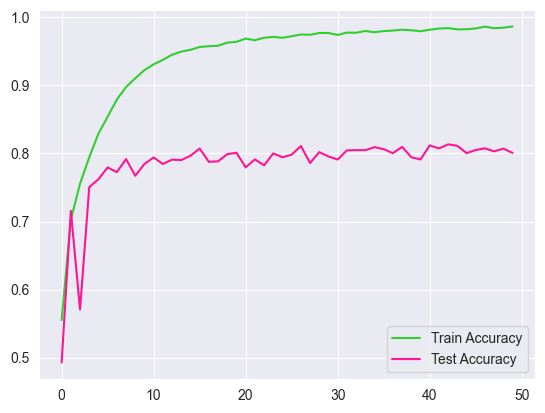

In [ ]:
#Plotting
plt.plot(his_model1.history['accuracy'], label='Train Accuracy', color='limegreen')
plt.plot(his_model1.history['val_accuracy'], label='Test Accuracy', color='deeppink')
plt.legend()

# Training with data augmentation

In [30]:
#data augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 
train_generator = data_generator.flow(train_images, train_labels, batch_size)

import math
steps_per_epoch = math.ceil(len(train_images) / batch_size)
 
his_model2 = model.fit(train_generator, validation_data=(test_images, test_labels),
              steps_per_epoch=steps_per_epoch, epochs=50)


C:\Users\RIHAB-PC\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 405s 259ms/step - accuracy: 0.7592 - loss: 0.8034 - val_accuracy: 0.7988 - val_loss: 0.6486
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 403s 258ms/step - accuracy: 0.7979 - loss: 0.6103 - val_accuracy: 0.7971 - val_loss: 0.6517
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 410s 262ms/step - accuracy: 0.8140 - loss: 0.5655 - val_accuracy: 0.8185 - val_loss: 0.5751
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 412s 263ms/step - accuracy: 0.8300 - loss: 0.5101 - val_accuracy: 0.8340 - val_loss: 0.5054
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 407s 260ms/step - accuracy: 0.8349 - loss: 0.4893 - val_accuracy: 0.8360 - val_loss: 0.5169
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 421s 269ms/step - accuracy: 0.8427 - loss: 0.4685 - val_accuracy: 0.8301 - val_loss: 0.5452
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 429s 275ms/step - accuracy: 0.8488 - loss: 0.4513 - val_accuracy: 0.8409 - val_loss: 0.4900
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 424s 271ms/step - ac

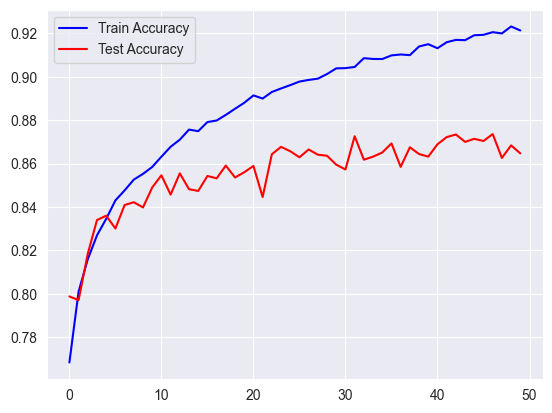

In [32]:
# Plot the data
plt.plot(his_model2.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(his_model2.history['val_accuracy'], label='Test Accuracy', color='red')
plt.legend()

# Evaluating Test accuracy

In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8665 - loss: 0.4809
Test accuracy: 0.8647000193595886


In [36]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


# Confusion Matrix

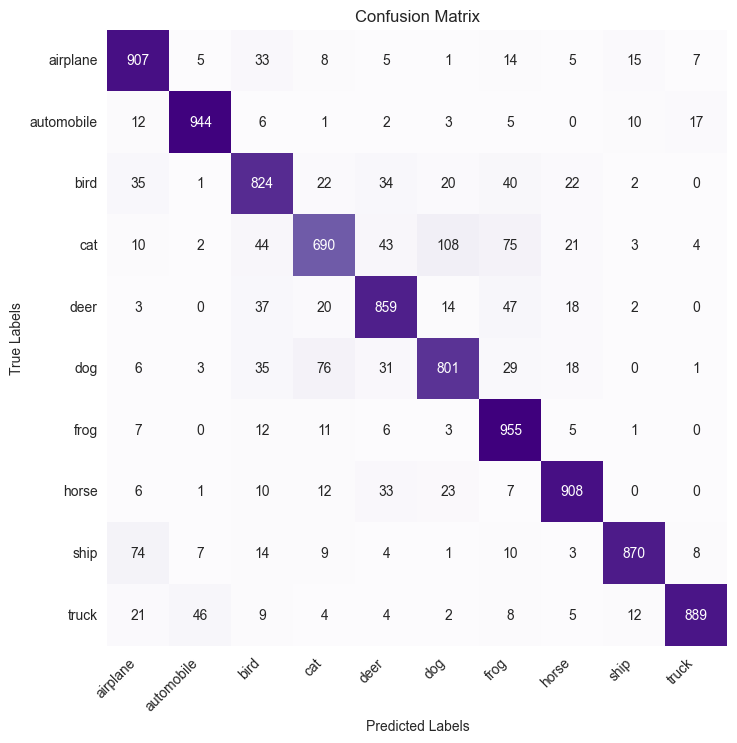

In [46]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", 
               "dog", "frog", "horse", "ship", "truck"]

conf_mat = confusion_matrix(
    y_true=test_labels,
    y_pred=predicted_labels
)

plt.figure(figsize=(8, 8))
sns.heatmap(
    conf_mat,
    cmap='Purples',  # Adjust the colormap if you like
    annot=True,
    cbar=False,
    fmt='.3g',
    xticklabels=class_names,  # Replace map_preds with class_names
    yticklabels=class_names  # Replace map_preds with class_names
)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Trying the model out/ Predictions

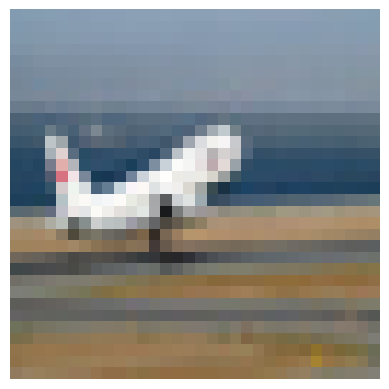

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
The original label is 'airplane' and our model predicts it is 'airplane'


In [103]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", 
               "dog", "frog", "horse", "ship", "truck"]

image_number = random.randint(0, len(test_images) - 1)
plt.imshow(test_images[image_number])
plt.axis("off")
plt.show()

n = np.array(test_images[image_number])
p = n.reshape(1, 32, 32, 3)
predictions = model.predict(p)

predicted_class_index = np.argmax(predictions)
predicted_label = class_names[predicted_class_index]

original_class_index = test_labels[image_number]
original_label = class_names[original_class_index]

print("The original label is '{}' and our model predicts it is '{}'".format(
    original_label, predicted_label))
